In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(os.getcwd() + "\\data\\DataForEDA.csv")
df["date"] = pd.to_datetime(df['date'], errors="raise", format="%Y/%m/%d %H:%M")
df.set_index("date", drop=True, inplace=True)
df_resampled = pd.DataFrame()
df_resampled = df.groupby("borough").resample('Y').agg("mean")

df_resampled.reset_index(["borough"], inplace=True)
df_resampled.reset_index(["date"], inplace=True)
print(df_resampled.head(3))
df_resampled['date'] = df_resampled['date'].dt.strftime('%Y')
df_asthma = pd.read_csv(os.getcwd() + "\\data\\asthma.csv")
df_resampled['admissions'] = df_asthma['admissions']

print(df_resampled.head(3))

        date               borough         nox        no2          no  \
0 2013-12-31  Barking and Dagenham  273.224039  83.934064  122.626902   
1 2014-12-31  Barking and Dagenham  320.445437  92.618760  147.636457   
2 2015-12-31  Barking and Dagenham  292.029357  87.563509  132.628812   

          o3       pm10      pm2.5        ws          wd   air_temp  
0  16.339082  27.376847  17.759930  3.600025  191.780313  49.899805  
1  13.950800  25.017057  16.352245  3.331963  195.448525  51.672340  
2  14.887460  23.275527  14.903589  3.420854  201.110842  49.819977  
   date               borough         nox        no2          no         o3  \
0  2013  Barking and Dagenham  273.224039  83.934064  122.626902  16.339082   
1  2014  Barking and Dagenham  320.445437  92.618760  147.636457  13.950800   
2  2015  Barking and Dagenham  292.029357  87.563509  132.628812  14.887460   

        pm10      pm2.5        ws          wd   air_temp  admissions  
0  27.376847  17.759930  3.600025  191.

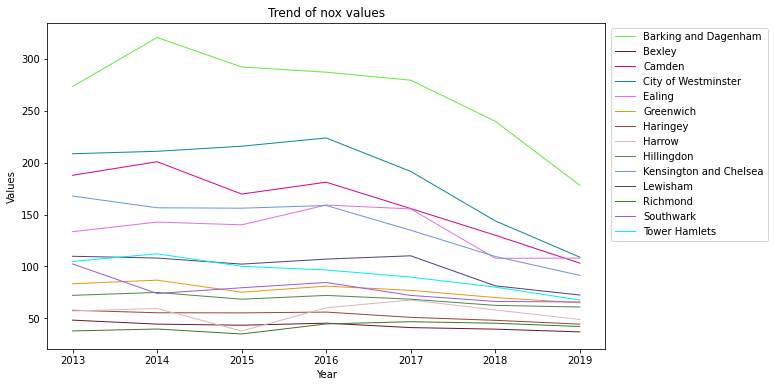

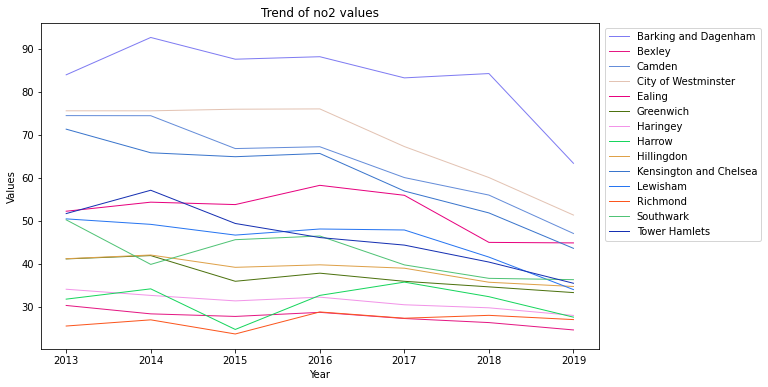

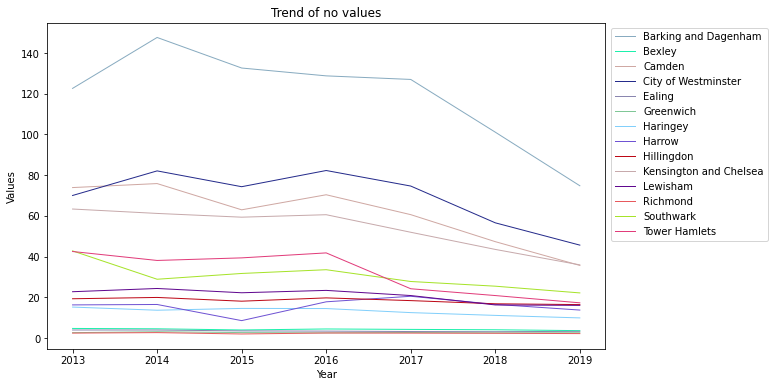

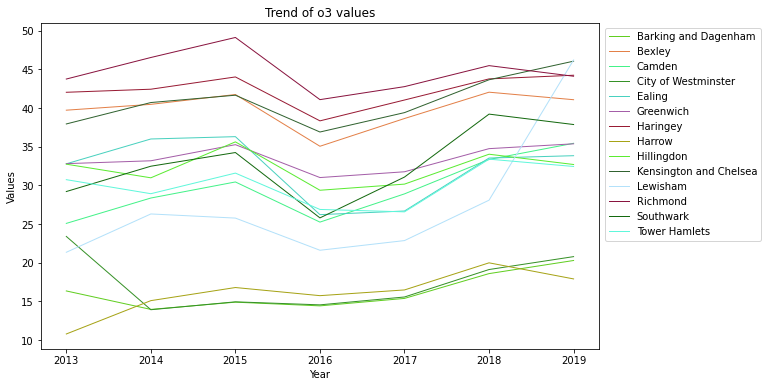

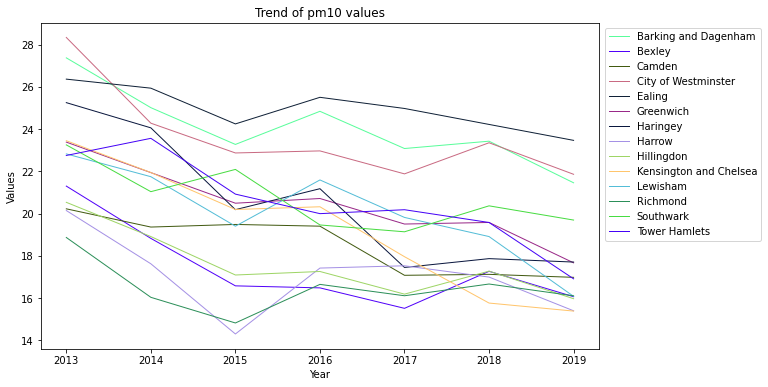

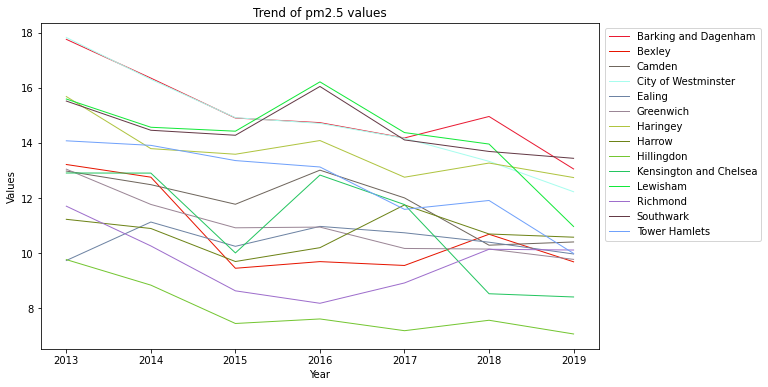

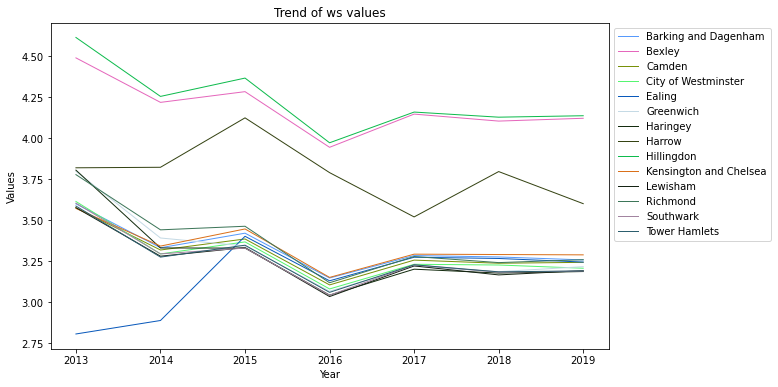

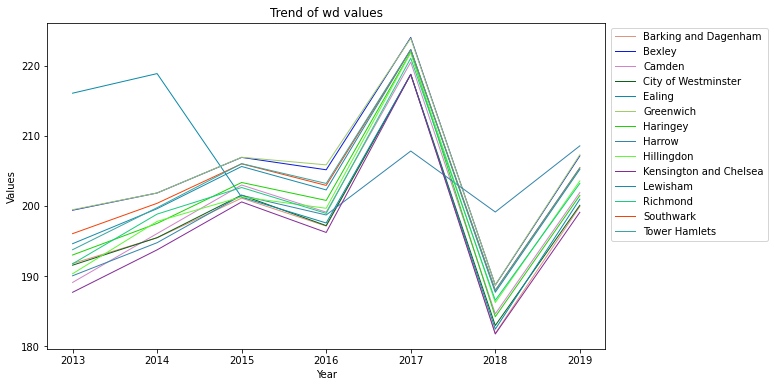

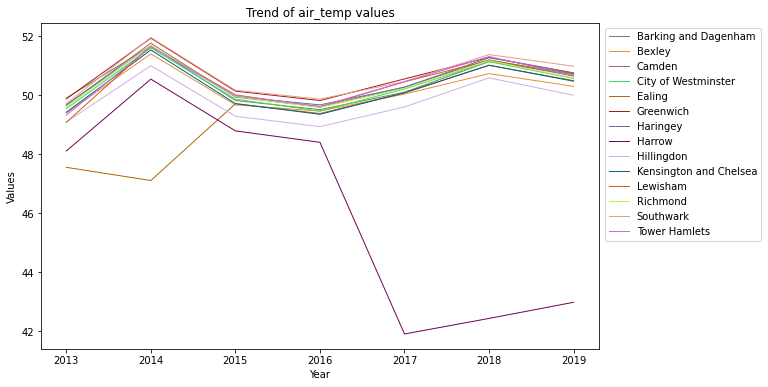

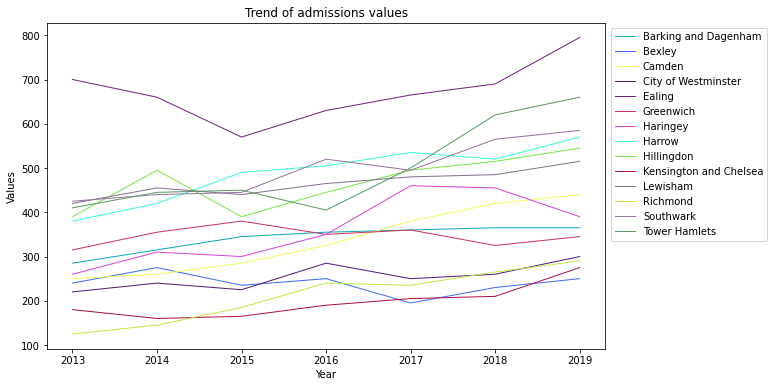

In [3]:
borough_list = ["Barking and Dagenham", "Bexley", "Camden", "City of Westminster", "Ealing", "Greenwich", "Haringey",
                "Harrow", "Hillingdon", "Kensington and Chelsea", "Lewisham", "Richmond", "Southwark", "Tower Hamlets"]
col_list = ["nox", "no2", "no", "o3", "pm10", "pm2.5", "ws", "wd", "air_temp", "admissions"]

for col in col_list:
    plt.figure(figsize=(10,6))
    for borough_name in borough_list:
        df1 = df_resampled.loc[df_resampled['borough'] == borough_name]
        plt.plot(df1.date, df1[col], c=np.random.rand(3,), linewidth=1, label=borough_name)
        
    plt.title(f'Trend of {col} values')
    plt.xlabel('Year')
    plt.ylabel('Values')
    leg = plt.legend(loc = 'upper right')
    ax = plt.gca()
    bb = leg.get_bbox_to_anchor().transformed(ax.transAxes.inverted())

    xOffset = 0.3
    bb.x0 += xOffset
    bb.x1 += xOffset
    leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
    plt.show()

In [4]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(df_resampled["borough"])
df_enc = pd.DataFrame()
df_enc["borough_names"] = list(encoder.classes_)
df_resampled["borough"] = encoder.transform(df_resampled["borough"])
df_enc["borough_labels"] = encoder.transform(df_enc["borough_names"])
print(df_enc)

             borough_names  borough_labels
0     Barking and Dagenham               0
1                   Bexley               1
2                   Camden               2
3      City of Westminster               3
4                   Ealing               4
5                Greenwich               5
6                 Haringey               6
7                   Harrow               7
8               Hillingdon               8
9   Kensington and Chelsea               9
10                Lewisham              10
11                Richmond              11
12               Southwark              12
13           Tower Hamlets              13


array([[<AxesSubplot:title={'center':'borough'}>,
        <AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'no2'}>],
       [<AxesSubplot:title={'center':'no'}>,
        <AxesSubplot:title={'center':'o3'}>,
        <AxesSubplot:title={'center':'pm10'}>],
       [<AxesSubplot:title={'center':'pm2.5'}>,
        <AxesSubplot:title={'center':'ws'}>,
        <AxesSubplot:title={'center':'wd'}>],
       [<AxesSubplot:title={'center':'air_temp'}>,
        <AxesSubplot:title={'center':'admissions'}>, <AxesSubplot:>]],
      dtype=object)

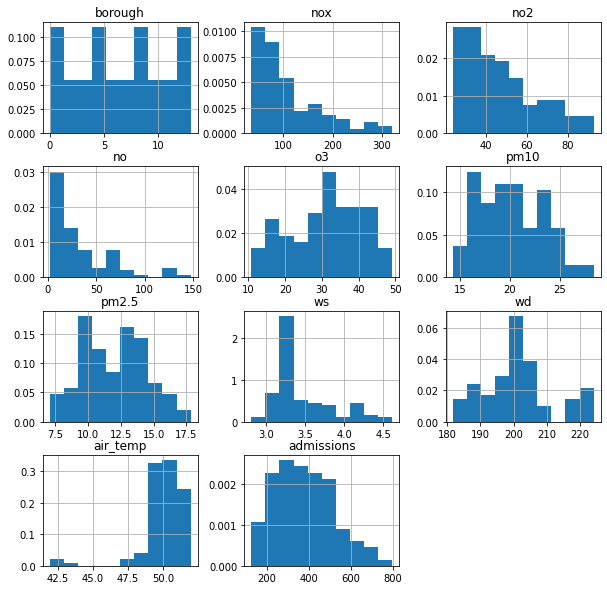

In [5]:
plt.rcParams['figure.figsize'] = [10, 10]
df_resampled.hist(density=True)

<AxesSubplot:>

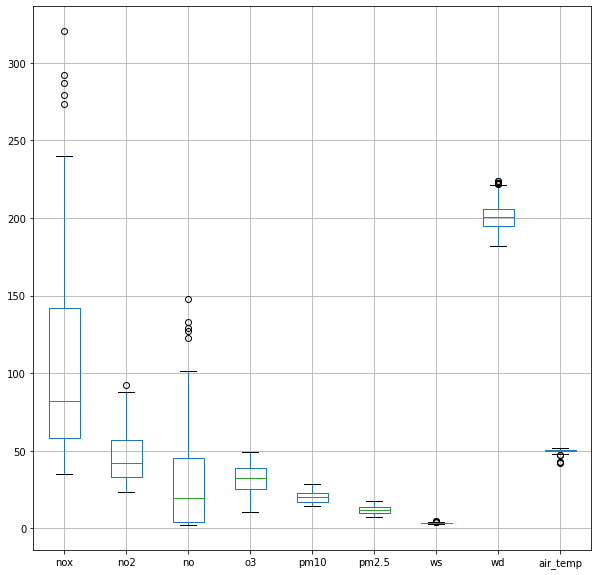

In [6]:
plt.rcParams['figure.figsize'] = [10, 10]
df_box = df_resampled.drop(["admissions", "borough"], axis=1)
df_box.boxplot()

<AxesSubplot:>

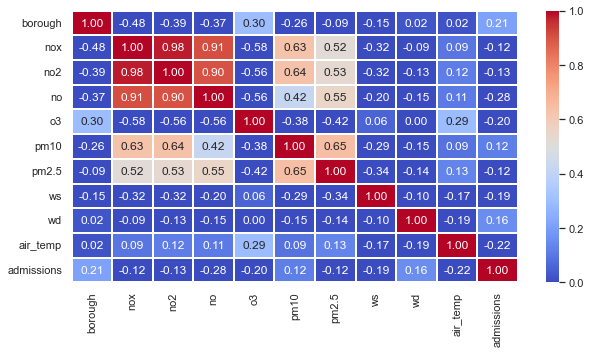

In [7]:
corr = df_resampled.corr(method ='pearson')
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(corr, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

<AxesSubplot:>

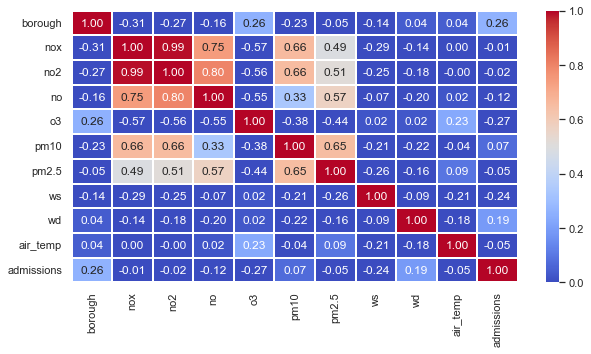

In [8]:
corr = df_resampled.corr(method ='spearman')
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(corr, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

<AxesSubplot:>

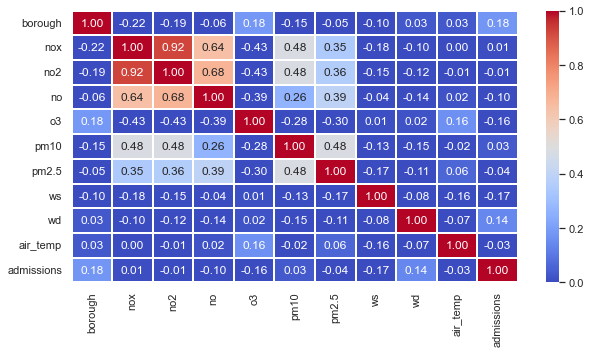

In [9]:
corr = df_resampled.corr(method ='kendall')
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(corr, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

In [10]:
from scipy.stats import pearsonr, spearmanr, kendalltau
x, y = df_resampled.nox, df_resampled.admissions
print('Pearson correlation, p-value: ',pearsonr(x, y))
print('Spearman correlation, p-value: ', spearmanr(x, y))
print('Kendall correlation, p-value: ', kendalltau(x, y))

Pearson correlation, p-value:  (-0.12205839347358895, 0.2311913204723841)
Spearman correlation, p-value:  SpearmanrResult(correlation=-0.006083466032665866, pvalue=0.9525928265676782)
Kendall correlation, p-value:  KendalltauResult(correlation=0.006132453684476984, pvalue=0.9290553156749896)


<AxesSubplot:>

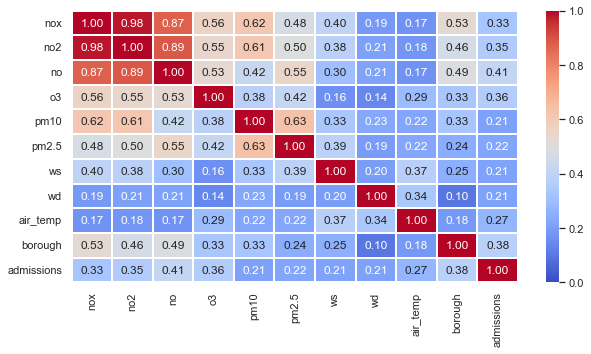

In [11]:
import dcor
data = df_resampled[["nox", "no2", "no", "o3", "pm10", "pm2.5", "ws", "wd", "air_temp", "borough", "admissions"]]
data = data.astype(np.float64)
cols = data.columns.values
n = len(cols)
centered = [ [0]*n for i in range(n)]
for i in range(n):
    for j in range(n):
        X = data[cols[i]]
        Y = data[cols[j]]
        centered[i][j] = dcor.distance_correlation(X, Y)

sns.heatmap(centered, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm', xticklabels=cols, yticklabels=cols)

<AxesSubplot:>

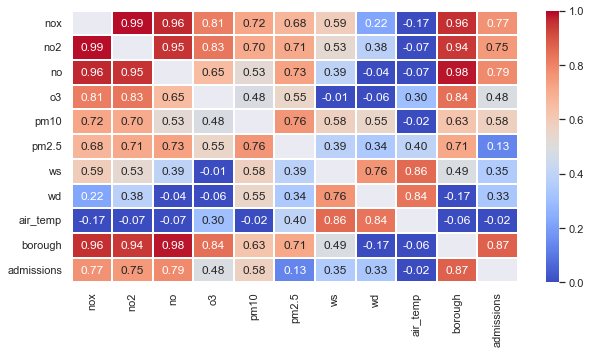

In [12]:
from ennemi import estimate_corr, pairwise_corr
pairwise = pairwise_corr(data)
sns.heatmap(pairwise, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

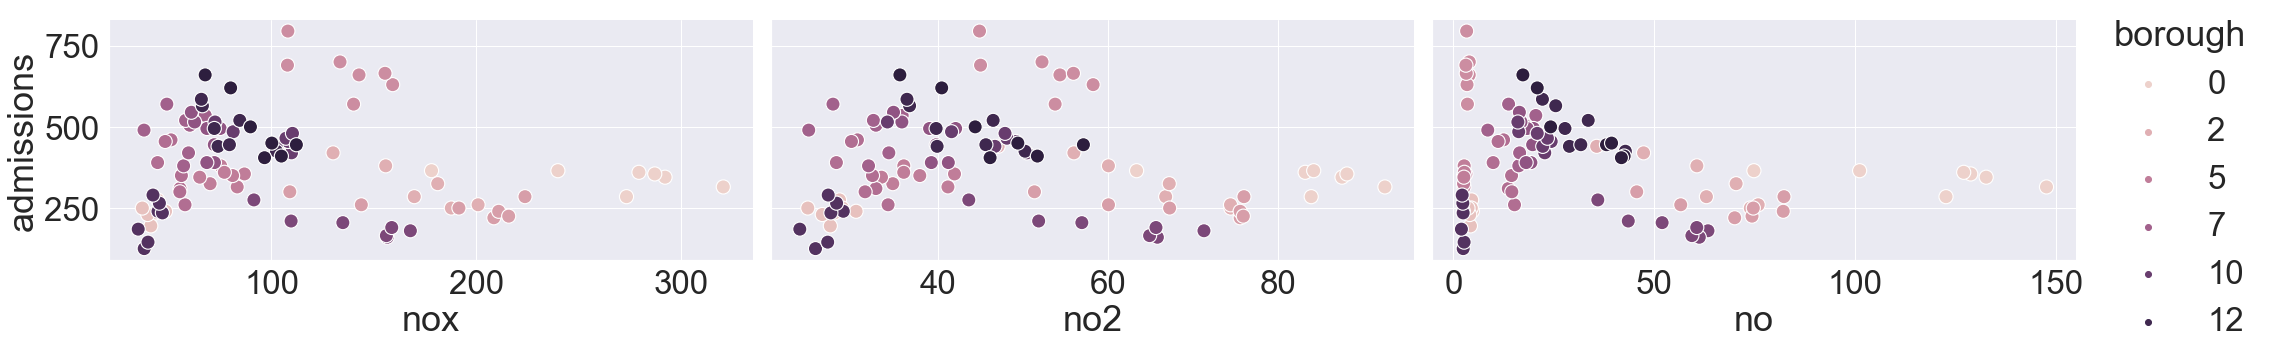

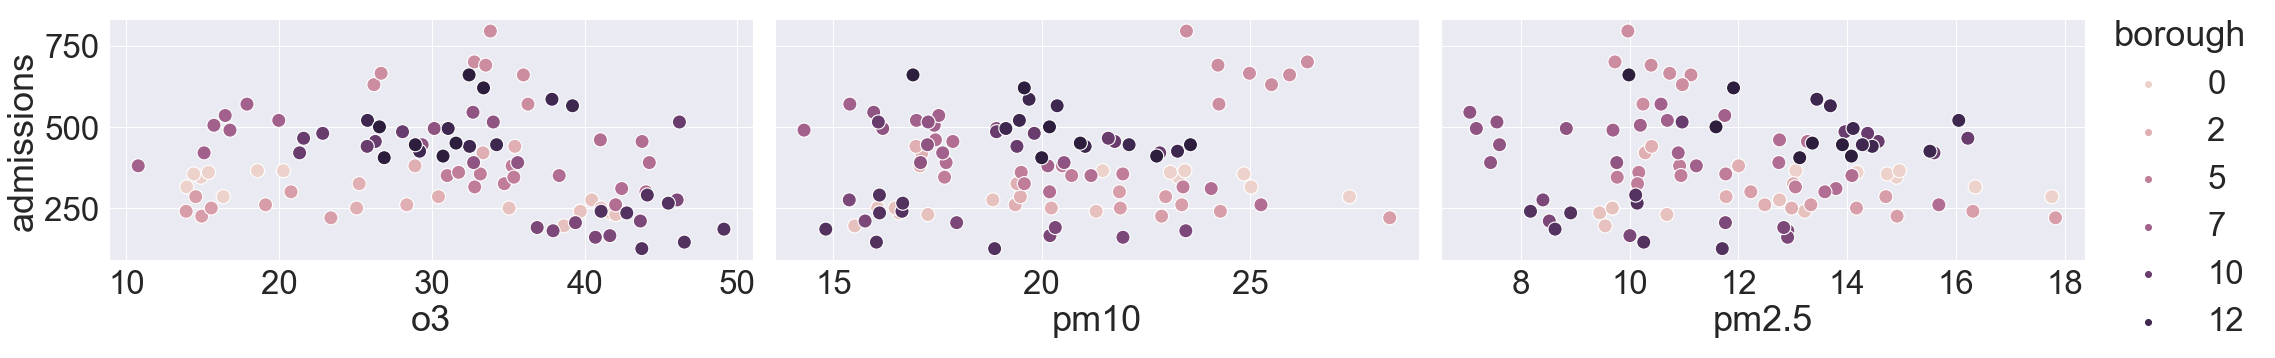

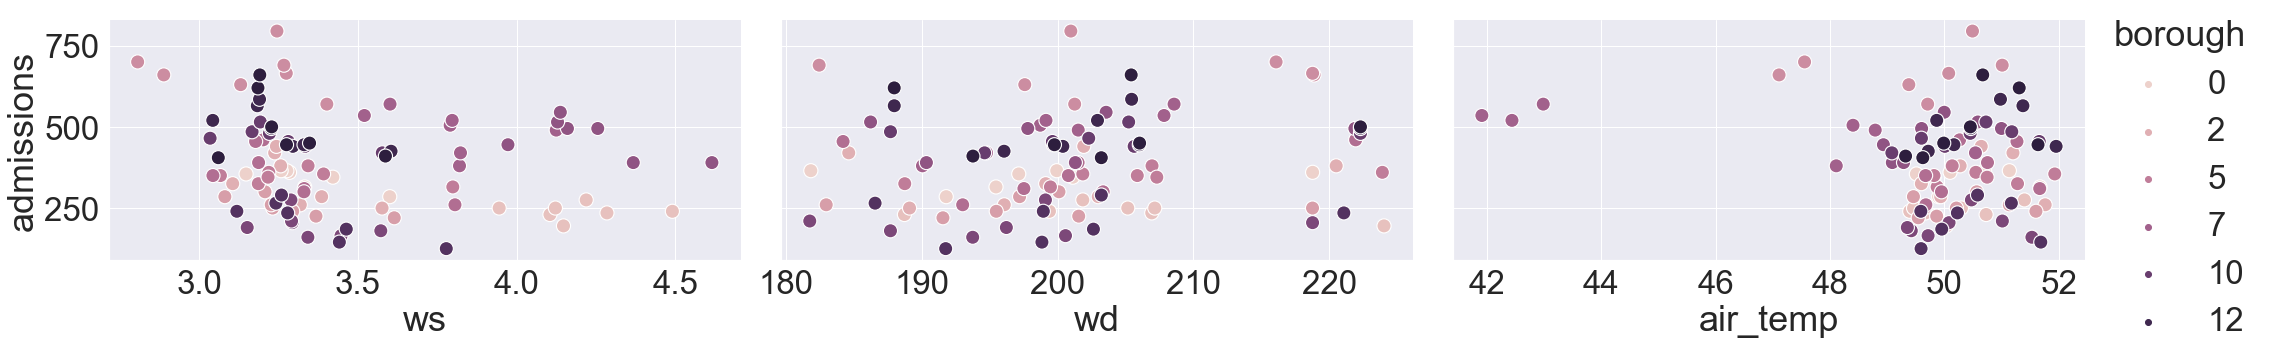

In [13]:
sns.set(rc = {'figure.figsize':(8,15)})
sns.set(font_scale = 3)
sns.pairplot(df_resampled, y_vars=["admissions"], height=5, aspect=2,
    x_vars=["nox", "no2", "no"],hue="borough", plot_kws ={'s':200})
sns.pairplot(df_resampled, y_vars=["admissions"], height=5, aspect=2,
    x_vars=["o3", "pm10", "pm2.5"],hue="borough", plot_kws ={'s':200})
sns.pairplot(df_resampled, y_vars=["admissions"], height=5, aspect=2,
    x_vars= ["ws", "wd", "air_temp"],hue="borough", plot_kws ={'s':200})

In [14]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_resampled.drop(["date", "borough"], axis=1)
cols = df_scaled.columns.values
print(cols)
scaler = StandardScaler().fit(df_scaled)
df_scaled = scaler.transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled["date"] = df_resampled["date"]
df_scaled["borough"] = df_resampled["borough"]
sns.set(font_scale = 1)
print(df_scaled.head(3))

['nox' 'no2' 'no' 'o3' 'pm10' 'pm2.5' 'ws' 'wd' 'air_temp' 'admissions']
        nox       no2        no        o3      pm10     pm2.5        ws  \
0  2.531864  2.141707  2.712114 -1.524356  2.288902  2.348639  0.379530   
1  3.250715  2.641974  3.459734 -1.771170  1.546846  1.771886 -0.327533   
2  2.818137  2.350775  3.011105 -1.674372  0.999208  1.178345 -0.093068   

         wd  air_temp  admissions  date  borough  
0 -0.889473 -0.052164   -0.697964  2013        0  
1 -0.540969  1.041659   -0.487068  2014        0  
2 -0.003011 -0.101426   -0.276173  2015        0  


(98, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nox       98 non-null     float64
 1   no2       98 non-null     float64
 2   no        98 non-null     float64
 3   o3        98 non-null     float64
 4   pm10      98 non-null     float64
 5   pm2.5     98 non-null     float64
 6   ws        98 non-null     float64
 7   wd        98 non-null     float64
 8   air_temp  98 non-null     float64
 9   borough   98 non-null     int32  
dtypes: float64(9), int32(1)
memory usage: 7.4 KB
None
[7 8 1 0 6 4 9 3 2]


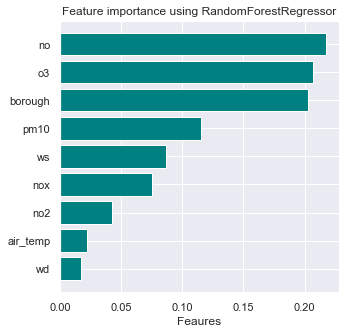

In [15]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X_train = df_scaled.drop(columns=['admissions', 'date'])#, 'deaths', 'cases'
print(df_scaled.shape)
y_train = df_scaled["admissions"]
print(X_train.info())
regressor = RandomForestRegressor(random_state=1, max_depth=4)
regressor.fit(X_train, y_train)
train_features = X_train.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)[-9:]
print(indices)
fig = plt.figure(figsize=(5, 5))
plt.barh(range(len(indices)), importances[indices], color="teal", align="center")
plt.yticks(range(len(indices)), [train_features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.xlabel("Feaures")
plt.title("Feature importance using RandomForestRegressor")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nox       98 non-null     float64
 1   no2       98 non-null     float64
 2   no        98 non-null     float64
 3   o3        98 non-null     float64
 4   pm10      98 non-null     float64
 5   pm2.5     98 non-null     float64
 6   ws        98 non-null     float64
 7   wd        98 non-null     float64
 8   air_temp  98 non-null     float64
 9   borough   98 non-null     int32  
dtypes: float64(9), int32(1)
memory usage: 7.4 KB
None
[5 0 1 7 6 3 9 8 2]


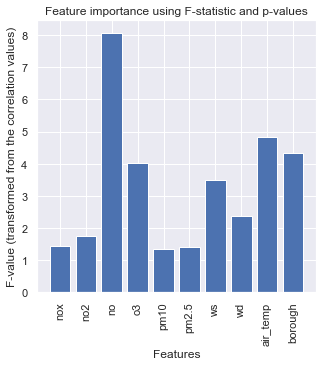

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

f_selector = SelectKBest(score_func=f_regression, k='all')

X_train = df_scaled.drop(columns=['admissions', 'date'])
print(X_train.info())
y_train = df_scaled["admissions"]
f_selector.fit(X_train, y_train)

X_train_fs = f_selector.transform(X_train)
indices = np.argsort(f_selector.scores_)[-9:]
print(indices)

fig = plt.figure(figsize=(5, 5))
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xticks([i for i in range(len(f_selector.scores_))], X_train.columns.values, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("F-value (transformed from the correlation values)")
plt.title("Feature importance using F-statistic and p-values")
plt.show()

[5 7 6 3 4 1 0 2 9]


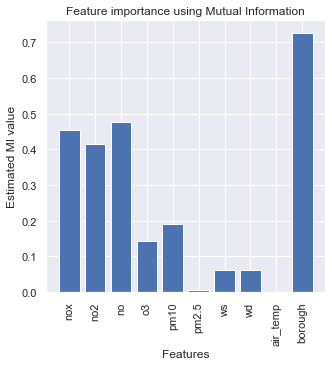

In [17]:
from sklearn.feature_selection import mutual_info_regression

f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
f_selector.fit(X_train, y_train)
X_train_fs = f_selector.transform(X_train)
indices = np.argsort(f_selector.scores_)[-9:]
print(indices)
fig = plt.figure(figsize=(5, 5))
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("Features")
plt.ylabel("Estimated MI value")
plt.title("Feature importance using Mutual Information")
plt.xticks([i for i in range(len(f_selector.scores_))], X_train.columns.values, rotation='vertical')
plt.show()